In [1]:
# Importing Libraries

import glob
import keras as ke
from keras import Sequential, layers, initializers
from keras.models import load_model
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the data

data = pd.read_csv("../kidney_disease.csv")

# Show the data

data.head(6)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd


In [3]:
columns_to_retain = [
    "sg",
    "al",
    "sc",
    "hemo",
    "pcv",
    "wbcc",
    "rbcc",
    "htn",
    "classification",
]

df = data.drop([col for col in data.columns if col not in columns_to_retain], axis=1)

df = df.dropna(axis=0)

In [4]:
for column in df.columns:
    if not np.issubdtype(df[column].dtype, np.number):
        df[column] = LabelEncoder().fit_transform(df[column])

In [5]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [6]:
x = df.drop(["classification"], axis=1)
y = df["classification"]

In [7]:
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [9]:
model = Sequential()
model.add(layers.Input(shape=(len(x.columns),)))
model.add(layers.Dense(
    256,
    kernel_initializer=initializers.RandomNormal(seed=13),
    activation="relu"
))
model.add(layers.Dense(1, activation="hard_sigmoid"))

In [10]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
history = model.fit(x_train, y_train, epochs=2000, batch_size=x_train.shape[0])

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.4760 - loss: 0.6886
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5983 - loss: 0.6829
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6856 - loss: 0.6772
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7511 - loss: 0.6715
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7904 - loss: 0.6659
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8166 - loss: 0.6605
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8253 - loss: 0.6551
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8384 - loss: 0.6498
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8384 - loss: 0.6445
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8472 - loss: 0.6393
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8515 - loss: 0.6342
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy

In [12]:
model.save("ckd.keras")

Text(0.5, 0, 'epoch')

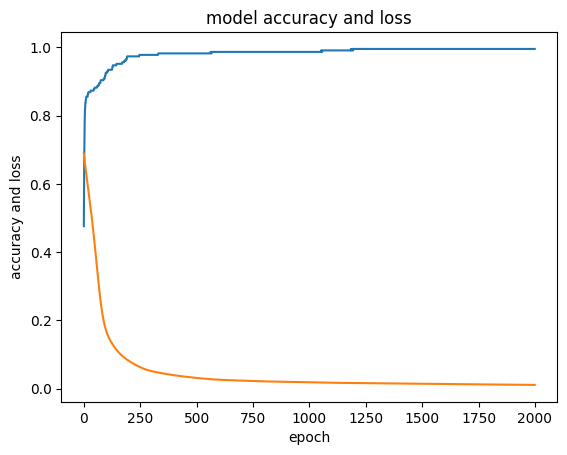

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy and loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")

In [14]:
print("shape of training data: ", x_train.shape)
print("shape of test data: ", x_test.shape)

shape of training data:  (229, 6)
shape of test data:  (58, 6)


In [15]:
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print("Original: {0}".format(", ".join(str(x) for x in y_test)))
print("Predicted: {0}".format(", ").join(str(x) for x in pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Original: 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0
0Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 0Predicted: , 0Predicted: , 0Predicted: , 1Predicted: , 1Predicted: , 0Predicted: , 0Predicted: , 0Predicted: , 0Predicted: , 1Predicted: , 1Predicted: , 0Predicted: , 1Predicted: , 1Predicted: , 0Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 0Predicted: , 0Predicted: , 0Predicted: , 0Predicted: , 1Predicted: , 1Predicted: , 1Predicted: , 1Predicted: , 1Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 1Predicted: , 0Predicted: , 0Predicted: , 0Predicted: , 1Predicted: , 1Predicte